In [130]:
'''
원본데이터 - 로그데이터

원본데이터  - 유저 특성 데이터 - 클러스터링 이후에 결과 집단의 특성을 토대로 비즈니스 전략 수립 가능


            - 비즈니스 전략 데이터


1. 유저 분석을 위한 유저 기준으로 정리된 데이터 - 클러스터링
=> 유저특성지표

row의 단위 : 유저 1명
col의 단위 : 해당 유저에 대한 통계량

EDA해서 나온 요소들을 통합하기

	1) R, F, M
                - 가중치
                   R - 총금액을 고려해서 얼마 이상은 (기간 * 0.8)
                   F - 총금액을 고려해서 얼마 이상은 (기간 * 1.2)
	2) 구매횟수대비 쿠폰사용율
  	3) 평균구매주기


2. 마케팅, 비즈니스 전략을 위한 데이터
=> 경향성 지표


	1) ROAS 지표 = 광고비 대비 매출액(수익)
	   단위기간 중 총 광고비용이 높은 특정 기간
      	   특정 기간 중에 거래량이 많은 집단 특정
	   전략 : 1)결과값을 보고 저희 주관이 들어간 요소

	2) 오프라인 비용으로부터 초래되는 비효율 줄이기
                주장 : 오프라인 마케팅이 효과가 미비하다
                         효과가 상대적으로 좋은 온라인이 오프라인에 맞춰서 조정되는 것이 비효율이다
	   
                오프라인비용 : 일주일단위로 조정 - 비탄력적 요소
                온라인비용 : 하루 단위로 조정 - 탄력적 요소

	    온라인, 오프라인 7일 이동평균 상관관계 = 0.74

	   총 마케팅비용과 총매출 간의 관계        = 0.14
                온라인비용이동평균과 총매출간의 관계 = 0.2









'''

'\n원본데이터 - 로그데이터\n\n원본데이터  - 유저 특성 데이터 - 클러스터링 이후에 결과 집단의 특성을 토대로 비즈니스 전략 수립 가능\n\n\n            - 비즈니스 전략 데이터\n\n\n1. 유저 분석을 위한 유저 기준으로 정리된 데이터 - 클러스터링\n=> 유저특성지표\n\nrow의 단위 : 유저 1명\ncol의 단위 : 해당 유저에 대한 통계량\n\nEDA해서 나온 요소들을 통합하기\n\n\t1) R, F, M\n                - 가중치\n                   R - 총금액을 고려해서 얼마 이상은 (기간 * 0.8)\n                   F - 총금액을 고려해서 얼마 이상은 (기간 * 1.2)\n\t2) 구매횟수대비 쿠폰사용율\n  \t3) 평균구매주기\n\n\n2. 마케팅, 비즈니스 전략을 위한 데이터\n=> 경향성 지표\n\n\n\t1) ROAS 지표 = 광고비 대비 매출액(수익)\n\t   단위기간 중 총 광고비용이 높은 특정 기간\n      \t   특정 기간 중에 거래량이 많은 집단 특정\n\t   전략 : 1)결과값을 보고 저희 주관이 들어간 요소\n\n\t2) 오프라인 비용으로부터 초래되는 비효율 줄이기\n                주장 : 오프라인 마케팅이 효과가 미비하다\n                         효과가 상대적으로 좋은 온라인이 오프라인에 맞춰서 조정되는 것이 비효율이다\n\t   \n                오프라인비용 : 일주일단위로 조정 - 비탄력적 요소\n                온라인비용 : 하루 단위로 조정 - 탄력적 요소\n\n\t    온라인, 오프라인 7일 이동평균 상관관계 = 0.74\n\n\t   총 마케팅비용과 총매출 간의 관계        = 0.14\n                온라인비용이동평균과 총매출간의 관계 = 0.2\n\n\n\n\n\n\n\n\n\n'

In [136]:
'''
목표1. 클러스터링 해보기
그것을 위한 숙제
1. RFM 간소화하기(클러스터링과의 비교군) => 7개 그룹정도?
    4 * 4 * 2 = 
    - 참고 및 평가요소(+ 실루엣 점수)
    1) 클러스터링을 통해 나온 그룹을 어떤 그룹으로 정의할지의 참고사항
    2) 우리만의 클러스터링이 가지고 있는 요소(ex. 우리가 한 클러스터링의 vip는 ㅇㅇㅇ가 RFM에 비해 높다, 대신 ㅇㅇㅇ는 관대하다)
    분류된 고객층 중에서 특정층을 공략하기 => 최종목표
2. Monetary별 가중치 해결하기
3. EDA를 통한 유저 특성 컬럼 추가하기


목표2. ROAS에 요소 추가
'''

'\n목표1. 클러스터링 해보기\n그것을 위한 숙제\n1. RFM 간소화하기(클러스터링과의 비교군) => 7개 그룹정도?\n    4 * 4 * 2 = \n    - 참고 및 평가요소(+ 실루엣 점수)\n    1) 클러스터링을 통해 나온 그룹을 어떤 그룹으로 정의할지의 참고사항\n    2) 우리만의 클러스터링이 가지고 있는 요소(ex. 우리가 한 클러스터링의 vip는 ㅇㅇㅇ가 RFM에 비해 높다, 대신 ㅇㅇㅇ는 관대하다)\n    분류된 고객층 중에서 특정층을 공략하기 => 최종목표\n2. Monetary별 가중치 해결하기\n3. EDA를 통한 유저 특성 컬럼 추가하기\n\n\n목표2. ROAS에 요소 추가\n'

In [51]:
import numpy as np
import pandas as pd

import datetime as dt
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

import re

In [52]:
df1 = pd.read_csv('open/Onlinesales_info.csv')
df2 = pd.read_csv('open/Customer_info.csv')
df3 = pd.read_csv('open/Discount_info.csv')
df4 = pd.read_csv('open/Marketing_info.csv')
df5 = pd.read_csv('open/Tax_info.csv')

In [53]:
df = pd.merge(df1, df2, how='left', on='고객ID')
df = pd.merge(df, df5, how='left', on='제품카테고리')

df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['월'] = df['거래날짜'].dt.month

In [54]:
def month_shift(x):
    dict = {1:'Jan',
            2:'Feb',
            3:'Mar',
            4:'Apr',
            5:'May',
            6:'Jun',
            7:'Jul',
            8:'Aug',
            9:'Sep',
            10:'Oct',
            11:'Nov',
            12:'Dec'}
    
    return dict[x]

In [55]:
df['월'] = df['월'].apply(month_shift)

In [56]:
df = pd.merge(df, df3, how='left', on=['월', '제품카테고리'])

In [57]:
df4['날짜'] = pd.to_datetime(df4['날짜'])
df = pd.merge(df, df4, how='left', left_on='거래날짜', right_on='날짜')

df = df.drop('날짜', axis=1)

In [58]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,오프라인비용,온라인비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,4500,2424.5
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,4500,2424.5
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,4500,2424.5
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,4500,2424.5
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,4500,2424.5


In [59]:
df.to_csv('merge.csv')

In [60]:
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,오프라인비용,온라인비용
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,4500,2424.5
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,4500,2424.5
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,4500,2424.5
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,4500,2424.5
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,4500,2424.5


In [61]:
df['쿠폰코드'] = df['쿠폰코드'].fillna(np.nan)
df['할인율'] = df['할인율'].fillna(0)
df['총금액'] = df['평균금액'] * df['수량']

today_date = dt.datetime(2019,12,31)
rfm = pd.DataFrame(df.groupby('고객ID').agg({'거래ID':'nunique',
                          '총금액':'sum',
                          '거래날짜': lambda x: (today_date - x.max()).days}))

rfm = rfm.rename(columns={'거래ID':'Frequency',
                          '총금액':'Monetary',
                          '거래날짜':'Recency'})
rfm = rfm[['Recency', 'Frequency', 'Monetary']]


In [62]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1468 entries, USER_0000 to USER_1467
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    1468 non-null   int64  
 1   Frequency  1468 non-null   int64  
 2   Monetary   1468 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 45.9+ KB


In [63]:
coupon = pd.DataFrame(df.groupby('고객ID')['쿠폰상태'].value_counts() / df.groupby('고객ID')['쿠폰상태'].count())

coupon_core = pd.DataFrame(coupon.loc[([i if i != 0 else 0 for i in df['고객ID'].unique()], 'Used'), :].sort_index())


rfm = pd.merge(rfm, coupon_core, how='left', on='고객ID').fillna(0)
rfm = rfm.rename(columns={'쿠폰상태':'쿠폰사용률'})

In [64]:
rfm['ratio'] = rfm['쿠폰사용률'] / rfm['Frequency']
rfm = rfm.drop('쿠폰사용률', axis=1)

In [65]:
last_date = dt.datetime(2019, 12, 31)

date = df.sort_values(['고객ID', '거래날짜'])[['고객ID', '거래날짜']].drop_duplicates()
date['구매주기'] = date.groupby('고객ID')['거래날짜'].diff().fillna(last_date-date['거래날짜'])

avg_buying = pd.DataFrame(date.groupby('고객ID')['구매주기'].mean()).reset_index()


rfm = pd.merge(rfm, avg_buying, how='left', on='고객ID').rename(columns={'구매주기':'평균구매주기'})

rfm['평균구매주기'] = rfm['평균구매주기'].dt.days

In [132]:
# 클러스터링에 사용할 유저 특성 테이블
rfm

,고객ID,Recency,Frequency,Monetary,ratio,평균구매주기
0,USER_0000,107,1,30.99,1.000000,107
1,USER_0001,59,31,13834.90,0.010753,168
2,USER_0002,73,8,1442.12,0.059783,155
3,USER_0003,17,11,1360.07,0.032086,17
4,USER_0004,107,13,1442.47,0.023504,107
...,...,...,...,...,...,...
1463,USER_1463,270,3,544.34,0.142857,270
1464,USER_1464,87,19,2363.05,0.021053,99
1465,USER_1465,194,2,101.56,0.187500,173
1466,USER_1466,69,1,298.00,0.000000,69


In [67]:
rfm.to_csv('user_feature.csv')

In [ ]:
##### 비즈니스 인사이트 테이블

In [68]:
#### ROAS 지표

df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,월,쿠폰코드,할인율,오프라인비용,온라인비용,총금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,4500,2424.5,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,Jan,ELEC10,10.0,4500,2424.5,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,0.10,Jan,OFF10,10.0,4500,2424.5,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,0.18,Jan,SALE10,10.0,4500,2424.5,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,0.18,Jan,AIO10,10.0,4500,2424.5,16.50


In [82]:
df['총마케팅비용'] = df['오프라인비용'] + df['온라인비용']
df['ma_total_marketing'] = df['총마케팅비용'].rolling(7).mean().fillna(method='bfill')
df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,...,가입기간,GST,월,쿠폰코드,할인율,오프라인비용,온라인비용,총금액,총마케팅비용,ma_total_marketing
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,...,12,0.10,Jan,ELEC10,10.0,4500,2424.50,153.71,6924.50,6924.50
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,...,12,0.10,Jan,ELEC10,10.0,4500,2424.50,153.71,6924.50,6924.50
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,...,12,0.10,Jan,OFF10,10.0,4500,2424.50,2.05,6924.50,6924.50
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,...,12,0.18,Jan,SALE10,10.0,4500,2424.50,87.65,6924.50,6924.50
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,...,12,0.18,Jan,AIO10,10.0,4500,2424.50,16.50,6924.50,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,...,45,0.10,Dec,ELEC30,30.0,4000,2058.75,121.30,6058.75,6058.75
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,...,45,0.18,Dec,SALE30,30.0,4000,2058.75,48.92,6058.75,6058.75
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,...,45,0.10,Dec,ELEC30,30.0,4000,2058.75,151.88,6058.75,6058.75
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,...,7,0.10,Dec,ELEC30,30.0,4000,2058.75,402.60,6058.75,6058.75


In [100]:
marketing = df[['거래날짜', '총마케팅비용']].drop_duplicates().reset_index(drop=True)

marketing2 = df[['거래날짜', '총마케팅비용']].drop_duplicates().reset_index(drop=True)
marketing2['ma_total_marketing'] = marketing2['총마케팅비용'].rolling(7).mean().fillna(method='bfill')
marketing2 = marketing2.rename(columns={'ma_total_marketing':'총마케팅비용(7일ma)'})
marketing2

,거래날짜,총마케팅비용,총마케팅비용(7일ma)
0,2019-01-01,6924.50,7477.351429
1,2019-01-02,7980.36,7477.351429
2,2019-01-03,6076.38,7477.351429
3,2019-01-04,7428.55,7477.351429
4,2019-01-05,8555.30,7477.351429
...,...,...,...
360,2019-12-27,7396.87,6754.795714
361,2019-12-28,7246.84,6702.525714
362,2019-12-29,6546.58,6664.971429
363,2019-12-30,4674.31,6375.631429


In [92]:
sales = df.groupby('거래날짜')['총금액'].sum().reset_index()
sales

,거래날짜,총금액
0,2019-01-01,7380.49
1,2019-01-02,13438.47
2,2019-01-03,23834.21
3,2019-01-04,16603.41
4,2019-01-05,17373.19
...,...,...
360,2019-12-27,13661.59
361,2019-12-28,10994.42
362,2019-12-29,12011.27
363,2019-12-30,8068.47


In [94]:
roas1 = pd.merge(marketing, sales, how='left', on='거래날짜')
roas1['ratio'] = roas1['총금액'] / roas1['총마케팅비용']
roas1.sort_values('ratio', ascending=False).head(10)

,거래날짜,총마케팅비용,총금액,ratio
150,2019-05-31,1510.30,21341.56,14.130676
94,2019-04-05,4842.68,54660.23,11.287186
29,2019-01-30,1681.86,18683.32,11.108725
151,2019-06-01,820.25,9018.75,10.995123
213,2019-08-02,3655.96,37859.70,10.355611
31,2019-02-01,1392.67,14363.76,10.313829
330,2019-11-27,5819.58,52454.29,9.013415
23,2019-01-24,1560.02,14025.51,8.990596
149,2019-05-30,1762.38,15779.30,8.953404
30,2019-01-31,2080.14,18073.50,8.688598


<AxesSubplot:>

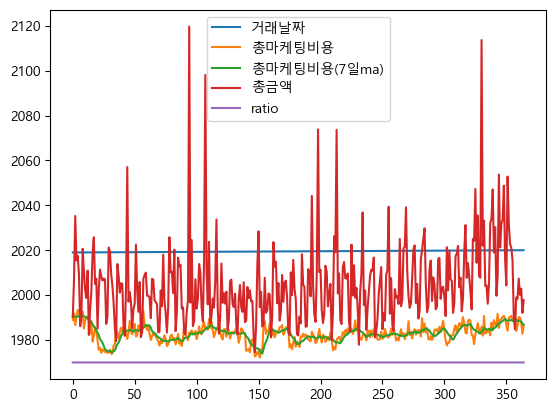

In [103]:
roas2 = pd.merge(marketing2, sales, how='left', on='거래날짜')
roas2['ratio'] = roas2['총금액'] / roas2['총마케팅비용(7일ma)']
roas2.sort_values('ratio', ascending=False).head(10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


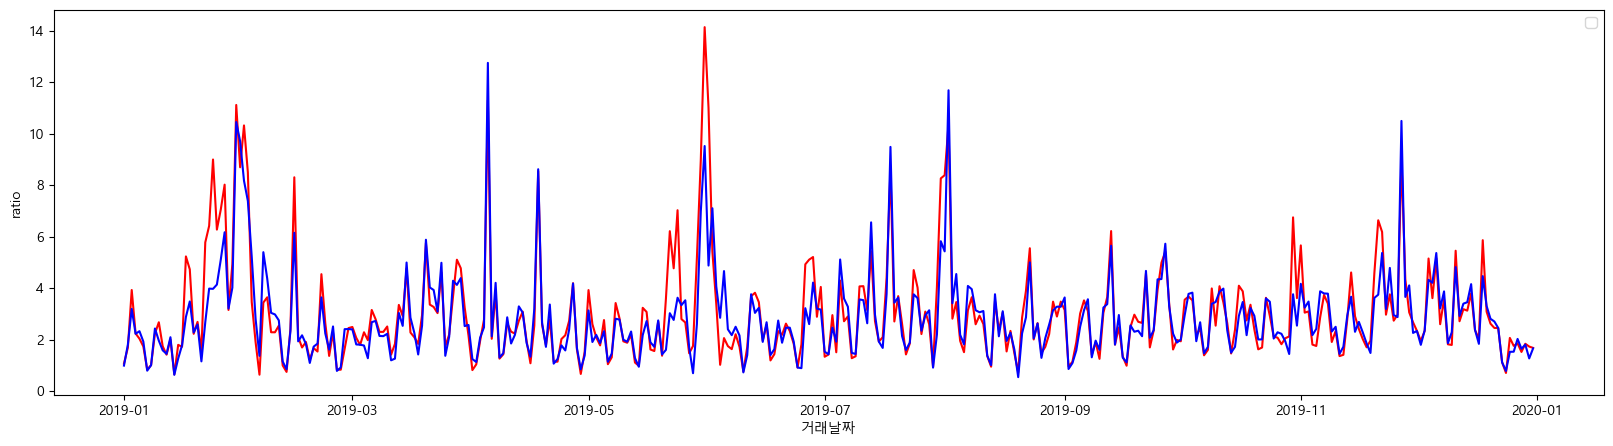

In [111]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=roas1, x='거래날짜', y='ratio', color='red')
sns.lineplot(data=roas2, x='거래날짜', y='ratio', color='blue')


# ratio(빨강) = 총비용 / 총마케팅비용
# ratio(파랑) = 총비용 / 총마케팅비용(이동평균)

# 총마케팅비용(이동평균) - 원본의 고점을 낮게 만드는 효과

# 마케팅의 특성상 직관적으로 볼때는 이동평균을 하는게 맞아보이는데


In [121]:
week = []
cut = 0


for i in range(1, 54):
    for j in range(7):
        week.append(i)
        if len(week) == len(roas1):
            break
    if len(week) == len(roas1):
        break

roas1['week'] = np.array(week).reshape(len(roas1), -1)
roas1

,거래날짜,총마케팅비용,총금액,ratio,week
0,2019-01-01,6924.50,7380.49,1.065852,1
1,2019-01-02,7980.36,13438.47,1.683943,1
2,2019-01-03,6076.38,23834.21,3.922436,1
3,2019-01-04,7428.55,16603.41,2.235081,1
4,2019-01-05,8555.30,17373.19,2.030693,1
...,...,...,...,...,...
360,2019-12-27,7396.87,13661.59,1.846942,52
361,2019-12-28,7246.84,10994.42,1.517133,52
362,2019-12-29,6546.58,12011.27,1.834740,52
363,2019-12-30,4674.31,8068.47,1.726131,52


In [123]:
week_core = pd.DataFrame(roas1.groupby('week')[['총마케팅비용', '총금액']].sum()).reset_index()
week_core['ratio_week'] = week_core['총금액'] / week_core['총마케팅비용']
week_core.sort_values('ratio_week', ascending=False).head(10)

,week,총마케팅비용,총금액,ratio_week
21,22,10081.86,71230.16,7.065180
3,4,13710.42,87743.55,6.399771
4,5,13870.26,86365.86,6.226694
30,31,21959.29,116861.52,5.321735
46,47,33355.78,130969.15,3.926430
47,48,37320.98,142809.00,3.826507
28,29,28218.83,103870.15,3.680881
20,21,18022.79,65563.08,3.637787
11,12,26066.40,93330.05,3.580473
13,14,31863.55,113142.14,3.550833


<AxesSubplot:xlabel='week', ylabel='총마케팅비용'>

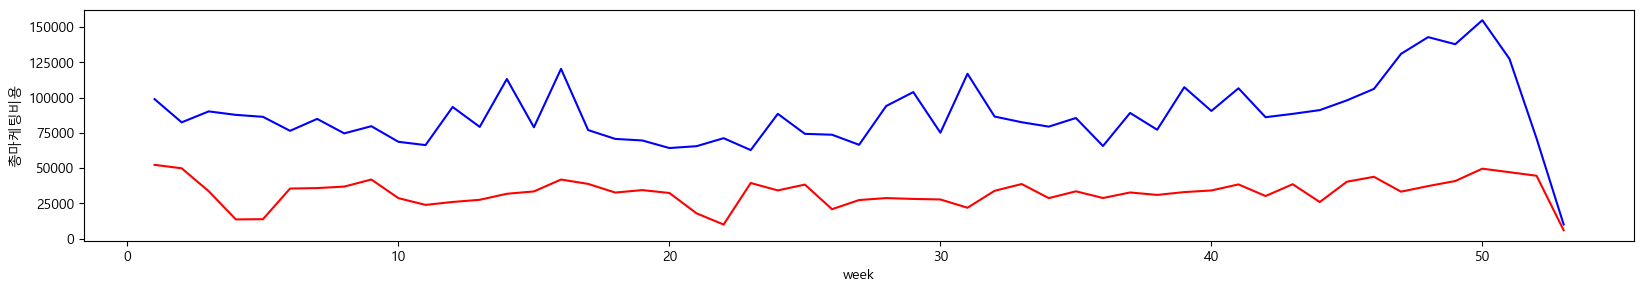

In [128]:
plt.figure(figsize=(20, 3))
sns.lineplot(data=week_core, x='week', y='총마케팅비용', color='red')
sns.lineplot(data=week_core, x='week', y='총금액', color='blue')


<AxesSubplot:xlabel='week', ylabel='ratio_week'>

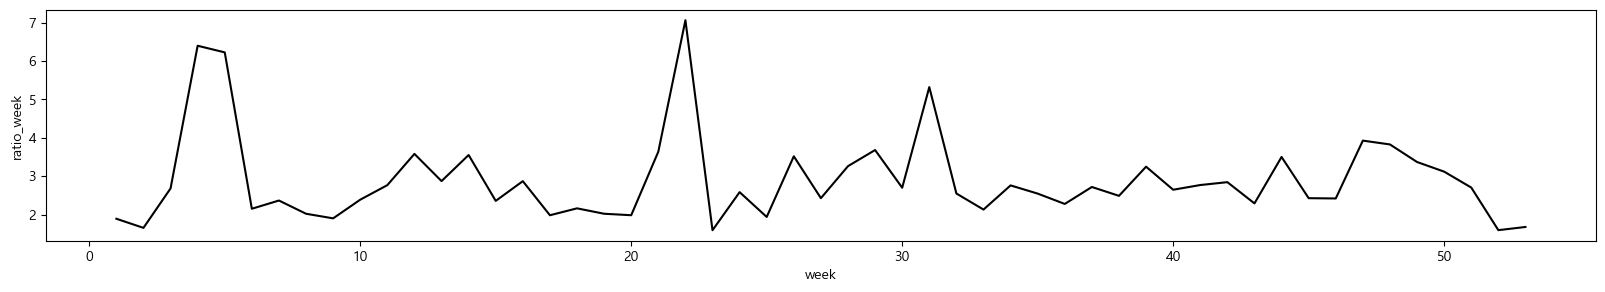

In [129]:
plt.figure(figsize=(20, 3))
sns.lineplot(data=week_core, x='week', y='ratio_week', color='black')